**Loading Packages**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [79]:
train=pd.read_csv('/content/train_LZdllcl (2).csv')

In [80]:
test=pd.read_csv('/content/test_2umaH9m (1).csv')

**copy of the train and test data**

In [81]:
train_original=train.copy()
test_original=test.copy()

In [82]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [83]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


**Understanding the Data**

In [84]:
train.shape

(54808, 14)

In [85]:
test.shape

(23490, 13)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


**Checking for missing values**

In [88]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [89]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [90]:
train.isna().sum()/len(train)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [91]:
test.isna().sum()/len(test)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

**Missing value handling using SimpleImputer**

In [92]:
cat_col=[
         'education',

         'previous_year_rating',

         ]

In [93]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train[cat_col]=imputer.fit_transform(train[cat_col])

In [94]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test[cat_col]=imputer.fit_transform(test[cat_col])

In [95]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [96]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

**Data Visualization**

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>,
        <Axes: title={'center': 'awards_won?'}>],
       [<Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>, <Axes: >]], dtype=object)

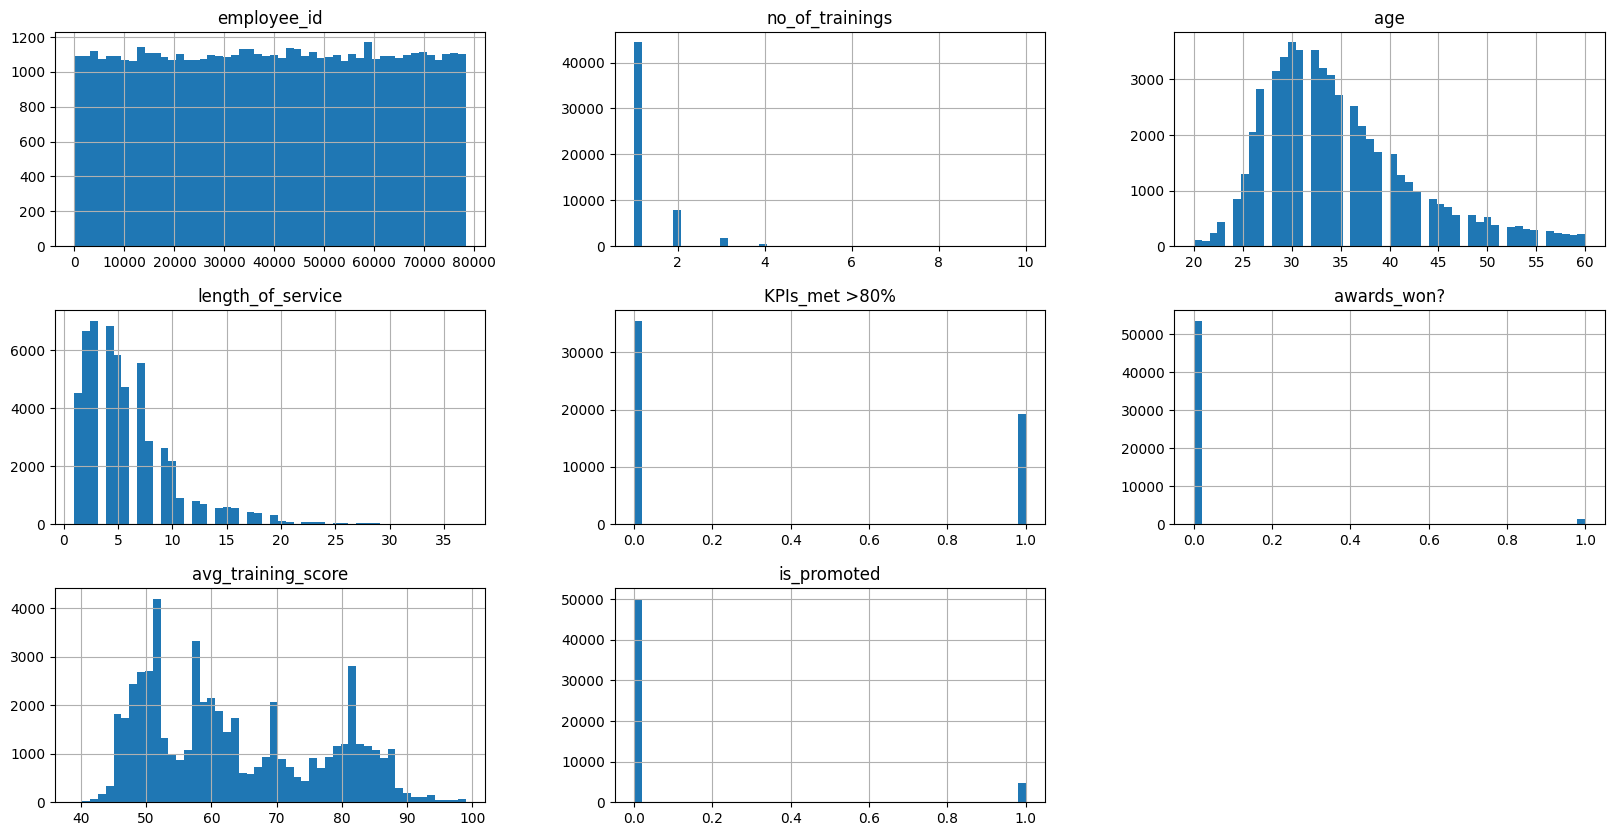

In [97]:
train.hist(figsize=(20,10),bins=50)

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>,
        <Axes: title={'center': 'awards_won?'}>],
       [<Axes: title={'center': 'avg_training_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

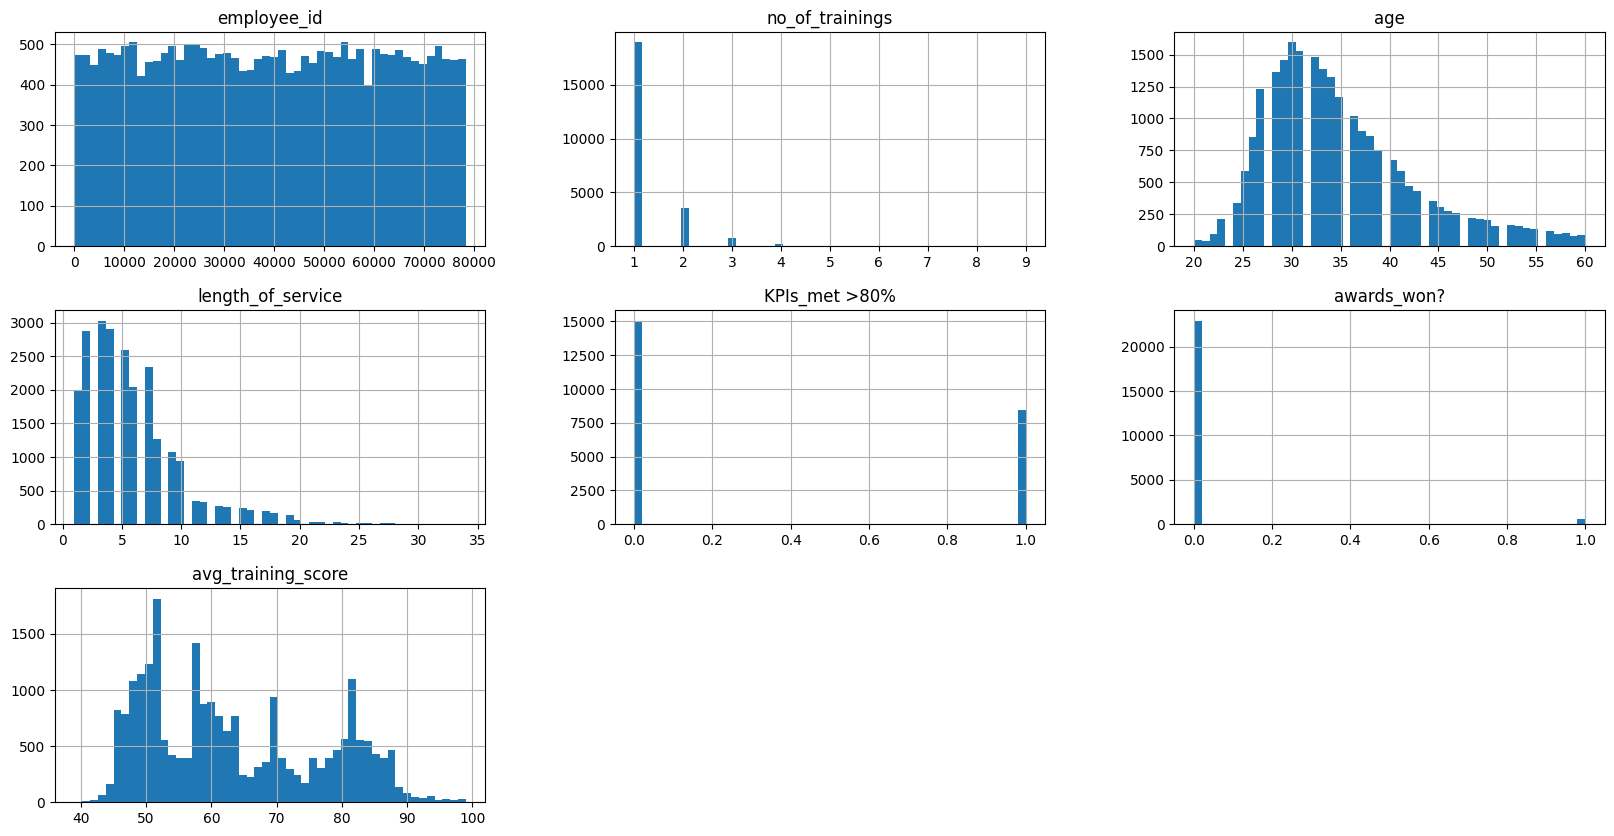

In [98]:
test.hist(figsize=(20,10),bins=50)

No ouliers detected

dropping employee id from both dataset as it contains all unique values

In [99]:
train.drop('employee_id',axis=1,inplace=True)
test.drop('employee_id',axis=1,inplace=True)

droping target variable from the training dataset and save it in another dataset.

In [100]:
x=train.drop('is_promoted',axis=1)
y=train.is_promoted

In [101]:
x

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45


In [102]:
x['previous_year_rating'].unique()

array([5.0, 3.0, 1.0, 4.0, 2.0], dtype=object)

**Encoding the datas**

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['education']=le.fit_transform(x['education'])
x['gender']=le.fit_transform(x['gender'])
x['recruitment_channel']=le.fit_transform(x['recruitment_channel'])
x['department']=le.fit_transform(x['department'])

In [104]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,region_7,2,0,2,1,35,5.0,8,1,0,49
1,4,region_22,0,1,0,1,30,5.0,4,0,0,60
2,7,region_19,0,1,2,1,34,3.0,7,0,0,50
3,7,region_23,0,1,0,2,39,1.0,10,0,0,50
4,8,region_26,0,1,0,1,45,3.0,2,0,0,73


In [105]:
x['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [106]:
x['region']=x['region'].map({'region_7':0,'region_22':1,'region_19':2,'region_23':3,'region_26':4,
       'region_2':5, 'region_20':6, 'region_34':7, 'region_1':8, 'region_4':9,
       'region_29':10, 'region_31':11, 'region_15':12, 'region_14':13, 'region_11':14,
       'region_5':15, 'region_28':16, 'region_17':17, 'region_13':18, 'region_16':19,
       'region_25':20, 'region_10':21, 'region_27':22, 'region_30':23, 'region_12':24,
       'region_21':25, 'region_8':26, 'region_32':27, 'region_6':28, 'region_33':29,
       'region_24':30, 'region_3':31, 'region_9':32, 'region_18':33})

In [107]:
x.head()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,0,2,0,2,1,35,5.0,8,1,0,49
1,4,1,0,1,0,1,30,5.0,4,0,0,60
2,7,2,0,1,2,1,34,3.0,7,0,0,50
3,7,3,0,1,0,2,39,1.0,10,0,0,50
4,8,4,0,1,0,1,45,3.0,2,0,0,73


In [108]:
x['previous_year_rating']=x['previous_year_rating'].astype('int64')

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   department            54808 non-null  int64
 1   region                54808 non-null  int64
 2   education             54808 non-null  int64
 3   gender                54808 non-null  int64
 4   recruitment_channel   54808 non-null  int64
 5   no_of_trainings       54808 non-null  int64
 6   age                   54808 non-null  int64
 7   previous_year_rating  54808 non-null  int64
 8   length_of_service     54808 non-null  int64
 9   KPIs_met >80%         54808 non-null  int64
 10  awards_won?           54808 non-null  int64
 11  avg_training_score    54808 non-null  int64
dtypes: int64(12)
memory usage: 5.0 MB


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['education']=le.fit_transform(test['education'])
test['gender']=le.fit_transform(test['gender'])
test['recruitment_channel']=le.fit_transform(test['recruitment_channel'])
test['department']=le.fit_transform(test['department'])

In [111]:
test['region']=test['region'].map({'region_7':0,'region_22':1,'region_19':2,'region_23':3,'region_26':4,
       'region_2':5, 'region_20':6, 'region_34':7, 'region_1':8, 'region_4':9,
       'region_29':10, 'region_31':11, 'region_15':12, 'region_14':13, 'region_11':14,
       'region_5':15, 'region_28':16, 'region_17':17, 'region_13':18, 'region_16':19,
       'region_25':20, 'region_10':21, 'region_27':22, 'region_30':23, 'region_12':24,
       'region_21':25, 'region_8':26, 'region_32':27, 'region_6':28, 'region_33':29,
       'region_24':30, 'region_3':31, 'region_9':32, 'region_18':33})

In [112]:
test['previous_year_rating']=test['previous_year_rating'].astype('int64')

In [113]:
test.dtypes

department              int64
region                  int64
education               int64
gender                  int64
recruitment_channel     int64
no_of_trainings         int64
age                     int64
previous_year_rating    int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
dtype: object

In [114]:
test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,4,0,1,2,1,24,3,1,1,0,77
1,2,9,0,0,0,1,31,3,5,0,0,51
2,7,18,0,1,0,1,31,1,4,0,0,47
3,5,5,0,0,0,3,31,2,9,0,0,65
4,1,10,0,1,2,1,30,4,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,5,1,1,2,1,24,3,1,0,0,61
23486,8,20,0,1,2,1,31,3,7,0,0,74
23487,2,19,0,0,2,1,26,4,4,0,0,50
23488,5,11,0,1,2,3,27,3,1,0,0,70


Training the model

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.42,random_state=42)

Logistic Regression Model

In [116]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
pred_cv=model.predict(x_cv)

In [118]:
from sklearn.metrics import accuracy_score,f1_score

In [119]:
print("f1 score is",f1_score(y_cv,pred_cv) )
print("accuracy score is",accuracy_score(y_cv,pred_cv) )

f1 score is 0.12331942512749189
accuracy score is 0.9178540399652476


KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
n=np.arange(3,15)
for k in n:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train,y_train)
  pred_cv=classifier.predict(x_cv)
  acc=accuracy_score(y_cv,pred_cv)
  metric_k.append(acc)

In [121]:
metric_k

[0.9211120764552563,
 0.9286707211120765,
 0.9270199826238054,
 0.928627280625543,
 0.9281928757602085,
 0.9285403996524761,
 0.929018245004344,
 0.9284969591659427,
 0.9285403996524761,
 0.9282797567332755,
 0.9283666377063423,
 0.9277584708948741]

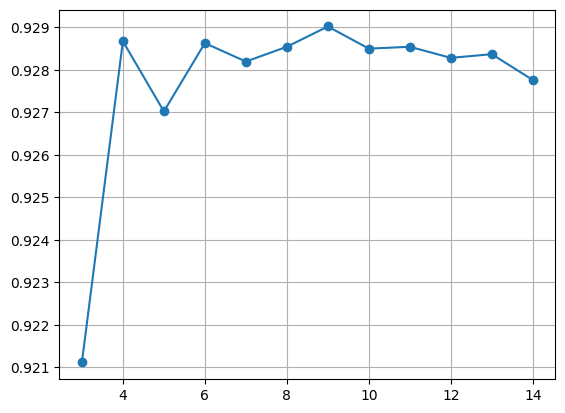

In [122]:
plt.plot(n,metric_k,'o-')

plt.grid()
plt.show()

In [123]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
classifier.fit(x_train,y_train)
pred1_cv=classifier.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred1_cv) )
print("accuracy score is",accuracy_score(y_cv,pred1_cv) )

f1 score is 0.24908088235294118
accuracy score is 0.929018245004344


SVM

In [124]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [125]:
pred2_cv=sv.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred2_cv))
print("accuracy score is",accuracy_score(y_cv,pred2_cv) )

f1 score is 0.0
accuracy score is 0.9191572545612511


Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [127]:
nb_pred_cv=nb.predict(x_cv)
print("f1 score is",f1_score(y_cv,nb_pred_cv) )
print("accuracy score is",accuracy_score(y_cv,nb_pred_cv) )

f1 score is 0.18721270371918095
accuracy score is 0.9155082536924414


Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [129]:
pred4_cv=clf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred4_cv) )
print("accuracy score is",accuracy_score(y_cv,pred4_cv) )

f1 score is 0.41685254027261465
accuracy score is 0.8977845351867941


In [130]:
from sklearn.ensemble import BaggingClassifier
tree=DecisionTreeClassifier()
bagging_clf=BaggingClassifier(estimator=tree,n_estimators=100,random_state=42)
bagging_clf.fit(x_train,y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [131]:
pred_bg_cv=bagging_clf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred_bg_cv) )
print("accuracy score is",accuracy_score(y_cv,pred_bg_cv) )

f1 score is 0.4805003679175865
accuracy score is 0.9386620330147698


In [132]:
from  sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(

)
rf.fit(x_train,y_train)


RandomForestClassifier()

In [133]:
pred_rf_cv=rf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred_rf_cv))
print("accuracy score is",accuracy_score(y_cv,pred_rf_cv) )

f1 score is 0.3925385239253853
accuracy score is 0.9349261511728931


AdaBoost

In [134]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train,y_train)


AdaBoostClassifier(n_estimators=100)

In [135]:
pred_ada_cv=ada_clf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred_ada_cv))
print("accuracy score is",accuracy_score(y_cv,pred_ada_cv) )

f1 score is 0.2903363133248191
accuracy score is 0.9275847089487402


In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
gb_clf.fit(x_train,y_train)


GradientBoostingClassifier(random_state=42)

In [137]:
pred_gb_cv=gb_clf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred_gb_cv))
print("accuracy score is",accuracy_score(y_cv,pred_gb_cv))

f1 score is 0.4401993355481728
accuracy score is 0.9414422241529106


In [138]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
pred_xgb_cv=xgb_clf.predict(x_cv)
print("f1 score is",f1_score(y_cv,pred_xgb_cv))
print("accuracy score is",accuracy_score(y_cv,pred_xgb_cv) )

f1 score is 0.5155420773313116
accuracy score is 0.9444830582102519


Best Method is XGBoost Classifier Method:51%(F1 score)
                                        94%(Accuracy)

* predictions for the test dataset.*

In [140]:
pred_test = xgb_clf.predict(test)

import the submission file

In [141]:
submission=pd.read_csv("/content/sample_submission_M0L0uXE (1).csv")

In [142]:
submission['is_promoted']=pred_test
submission['employee_id']=test_original['employee_id']

In [143]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [144]:
submission.to_csv('new_submission.csv',index=False)
new_submission=pd.read_csv('new_submission.csv')
new_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
